In [6]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

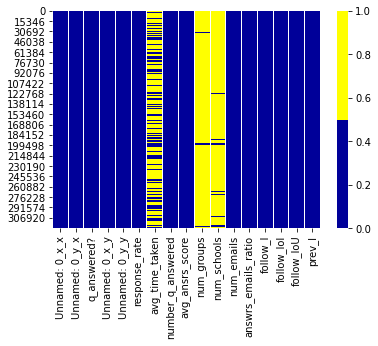

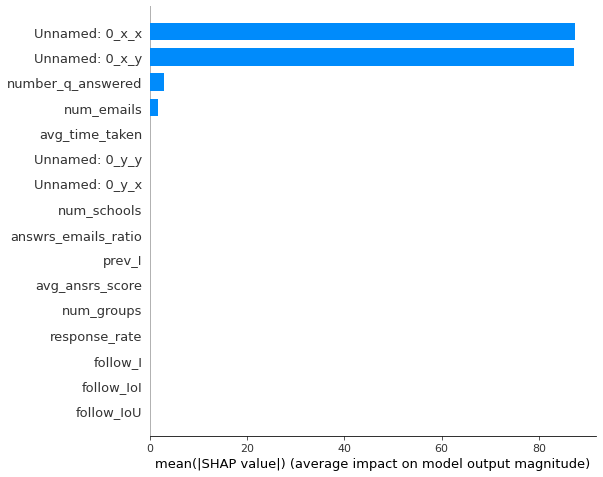

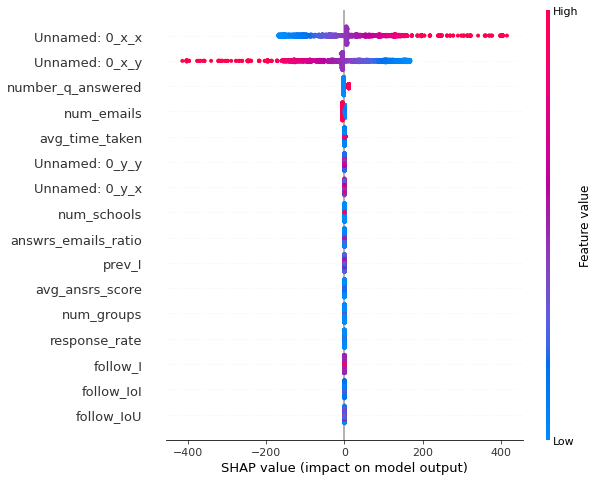

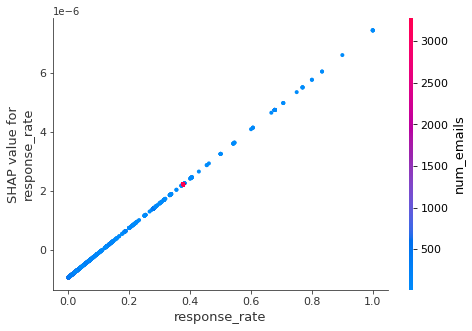

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                156       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 341
Trainable params: 341
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


ValueError: in user code:

    /Users/juan/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /Users/juan/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/juan/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/juan/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/juan/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/juan/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:789 run_step  **
        outputs = model.train_step(data)
    /Users/juan/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:747 train_step
        y_pred = self(x, training=True)
    /Users/juan/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    /Users/juan/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:212 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected axis -1 of input shape to have value 12 but received input with shape [None, 16]


ValueError: in user code:

    /Users/juan/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /Users/juan/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/juan/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/juan/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/juan/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/juan/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:789 run_step  **
        outputs = model.train_step(data)
    /Users/juan/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:747 train_step
        y_pred = self(x, training=True)
    /Users/juan/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    /Users/juan/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:212 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected axis -1 of input shape to have value 12 but received input with shape [None, 16]


In [11]:
%run Data_prep_and_model.ipynb

### Testing Environment Simulation Overview

In order to test how well our model works on ‘new questions’. We will create an event-driven simulation that simulates CareerVillage. The simulation does the following:

- Generate a question:
    We will randomly generate questions with a given timestamp at which the question would be posted. We perform Bayesian Inference to determine these timestamps using the provided data. 
   
- Send the question to 200 professionals:
    We run the trained neural network on the randomly generated question, paired with every professional, and determine the probability that the question will be answered by a given professional. We then choose the top 200 probabilities and send them the questions.
    
- Answering the questions:
    The professionals answer a given question with the given probability output by the Neural Network. For those that do answer the question, we again perform Bayesian Inference to determine the time that the professional will take to answer a given question and we post the answers accordingly.

    . The events will be random generated questions with a given timestamp at which they should be posted. The simulation will run and each question will be posted according to its time stamp. Whenever a question is posted, the model will be used to choose who to send the question to. For each one of those the question is sent to, they will answer the question according to the probability that the model generated (e.g. if the model said professional x will answer with 70% then that’s the probability that they will answer within the simulation). We will let the simulation run for a certain amount of time (e.g. 10 months of the simulation time). 
 We will record several metrics and the results should help us estimate the performance of our model i.e. if more questions get answered in our simulation, then the model is working well. Using the simulation, we can perform data analysis that should inform us of the performance of the technique above (e.g. the response rate, how fast questions are answered...etc). That should give us enough information to improve the model.
